# Introdução a Inferencia Bayesiana

Inferencia Bayesiana geralmente se refere a regra descoberta por Thomas Bayes no século 18 sobre como calibrar seu grau de credibilidade em uma hipótese de acordo com a  evidência disponível. Conceitualmente, Bayes nos diz que você pode ter graus de confiança em uma ideia, desde que não queira acreditar nela ou rejeitá-la. Para isso você pode conceber esses graus de confiança como probabilidades entre zero, que significa que você tem certeza de que é falso, e um que significa que você tem certeza de que é verdade. Assim, interpretamos os graus de confiança como probabilidades e podemos traduzir seu grau de crença de uma hipótese em um número, e a partir daí a matemática da probabilidade se aplica.

## Teorema de Bayes

O teorema de Bayes é um corolário da lei da probabilidade total e é espresso como:

$$ P(y | x) = \frac{P(x|y) P(y)}{P(x)} = \frac{P(x|y) P(y)}{\sum_{y\in\mathcal{Y}} P(x|y) P(y)} $$

P(x) e P(y) são as probabilidades a priori de x e x;

$P(x | y)$ é a probabilidade a posteriori (probabilidade condicionada) de x condicional a y;

$P(y | x)$ é a probabilidade a posteriori (probabilidade condicionada) de y condicional a x;



## Pensando em termos Bayesianos

Suponha que você tem o teste positivo para uma doença, queremos saber: você realmente tem a doença?

Para respondermos a pergunta em termos probabilisticos, precisamos olhar primeiro as evidências disponíveis. Uma maneira de fazer isso é olhando a taxa de base de casos da doença em seu grupo. Ou seja, qual é a fraçao da população que tem a doença em uma determinada faixa etária. Essa informação é o que chamamos de informação "a priori" ou "prior" em ingles.

Com isso podemos então olhar para a verosemelhança, ou seja, se a hipótese fosse verdadeira, então qual a probabilidade de voce observar a evidência de que você está observando, no caso, se você tivesse a doença, de obter um resultado positivo no teste. Para testes esse valor em geral é a sensibilidade do teste. Isso não diz nada sobre se é verdade ou não, apenas diz que se fosse verdade você veria essa evidencia.

O resultado final então é dado pela multiplicação dessas duas probabilidades, normalizada pela probabilidade de se ter essa evidencia em todas as possibilidades.


Em termos mais concretos, suponha que a probabilidade de uma ter uma doença seja de 1%. Há um teste para a doença que está correto 90% das vezes, ou seja, se uma pessoa tiver a doença, os resultados do teste é positivo 90% das vezes. Mas como muitos exames médicos, existem alguns falsos positivos e há uma taxa nesse caso de 1% de falso positivo. Quais são as chances de que ela tem a doença?

As informações iniciais fornecidas são as seguintes:

- P(D): Probabilidade de ter a doença  - 1%
- P(não D): P(D) de 1% implica que 99% não tema doença
- P(T): Probabilidade de teste positivo - 90%
- 1% ou 0,01 falso positivo, ou seja, se não tem a doença, acerta 99% das vezes (dado)
- 10% ou 0,1 falso negativo, ou seja, se tem a doença, acerta 90% das vezes (dado)

P(D|T): Nosso objetivo, que é encontrar a probabilidade de ter a doença, dado um teste positivo

usando o teorema de Bayes temos:

$$ P(D | T) = \frac{P(T|D) P(D)}{P(T)} $$

$$ P(T) = P(T|D) \times P(D) + P(T| \neg D) \times P(\neg D) $$

o que nos dá:

$$ P(D|T) = 0.9 * 0.01 / 0.9 * 0.01 + 0.01 * 0.99 $$

Ou seja, $ P(D|T) = 0.48$ o que nos diz que a probabilidade da pessoa ter a doença é de 48%.


### Inferência:
"o ato de passar de uma proposição, afirmação ou julgamento considerado como verdadeiro para outra cuja verdade se acredita seguir da primeira" (Webster)
As premissas A,B,…→ hipótese, H?

### Inferência dedutiva:
As premissas permitem a determinação definitiva da verdade/falsidade de H (silogismos, lógica simbólica, álgebra booleana)
B(H|A,B,...)=0 ou 1

### Inferência indutiva:
As premissas se referem à verdade/falsidade de H, mas não permitem sua determinação definitiva (silogismos fracos, analogias)
A,B,C,D compartilham propriedades x,y,z; E tem propriedades x,y
→ $E$ provavelmente tem a propriedade z.

# Exemplo: Esta é uma moeda honesta?

Vamos analisar um experimento simples de lançamento de moedas. Dado que observamos 6 caras em 8 lançamentos, você acharia que era uma moeda honesta? 

Em geral esperamos que tenhamos uma chance de 1:1 em um lançamento de uma moeda honesta. Se decidirmos que a moeda era honesta, a questão que se segue naturalmente é: até que ponto temos certeza de que foi assim; se não foi justo, quão injusto achamos que foi? 

Além disso, se continuarmos coletando dados para essa moeda em particular, observando os resultados de lançamentos adicionais, como atualizaríamos nossa crença na justiça da moeda?

Uma maneira sensata de formular esse problema é considerar um grande número de hipóteses sobre o intervalo no qual o viés da moeda pode estar. Se denotarmos a ponderação de viés por H, então H=0 e H=1 podem representar uma moeda que produz uma coroa ou uma cara em cada lançamento, respectivamente. Existe um continuum de possibilidades para o valor de H entre esses limites, com H=0.5 indicando uma moeda honesta. 

Nosso estado de conhecimento sobre a justiça, ou o grau de injustiça, da moeda é então completamente resumido especificando o quanto acreditamos que essas várias proposições sejam verdadeiras.

Vamos realizar uma simulação computacional de um experimento de lançamento de moedas. Isso fornece os dados que estaremos analisando.

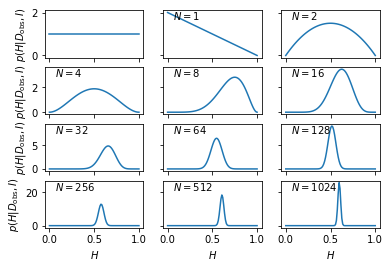

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(999)         # for reproducibility
a=0.6                       # biased coin
flips=np.random.rand(2**12) # simulates 4096 coin flips
heads=flips<a               # boolean array, heads[i]=True if flip i is heads

def prior(H):
    p=np.zeros_like(H)
    p[(0<=x)&(x<=1)]=1      # allowed range: 0<=H<=1
    return p                # uniform prior
def likelihood(H,data):
    N = len(data)
    no_of_heads = sum(data)
    no_of_tails = N - no_of_heads
    return H**no_of_heads * (1-H)**no_of_tails
def posterior(H,data):
    p=prior(H)*likelihood(H,data)
    norm=np.trapz(p,H)
    return p/norm

x=np.linspace(0,1,100)
fig, axs = plt.subplots(nrows=4,ncols=3,sharex=True,sharey='row')
axs_vec=np.reshape(axs,-1)
axs_vec[0].plot(x,prior(x))
for ndouble in range(11):
    ax=axs_vec[1+ndouble]
    ax.plot(x,posterior(x,heads[:2**ndouble]))
    ax.text(0.1, 0.8, '$N={0}$'.format(2**ndouble), transform=ax.transAxes)
for row in range(4): axs[row,0].set_ylabel('$p(H|D_\mathrm{obs},I)$')
for col in range(3): axs[-1,col].set_xlabel('$H$')